In [0]:
# https://keras.io/

#Statement start with "!" is a command in Colab.
#The following command will quitly install keras python module from python packaging index
#After installing keras, it is being imported

!pip install -q keras
import keras

In [0]:
#numpy is imported with "np" as kind of alias. 
#From here on we can use np instead of numpy.

import numpy as np

#The following would import relevant models and layer. 
#Also, we have imported the mnist data set.

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [4]:
# Load MNIST data set into training data and test set data
# There are 70,000 images with their labels in MNIST dataset.
# Randomly, 60k will be loaded into X_train and their corresponding labels y_train.
# Remaining 10k images will be loaded into X_test and their labels y_test.

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


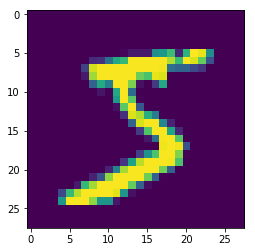

In [5]:
#Printing the shape of Training data set
#From this print statement, there are 60,000 images in X train of size 28X28.
#Correspoindingly, y_train is a column matrics of size 60000

print (X_train.shape)


# Using plt.imshow method from matplot library, the first image is printed. y[0] will be have a value of 5.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Convert the images in training dataset and test set into multidimentional arrays of their pixel intensity values.

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Convert the pixel intensity values into floating point value and normalize the pixel intensities by dividing with 255. Max value of pixel intensity is 255.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

# This will convert the numbers in the Y_train and y_test into column metrics of size 10. Element corresponding to the number will have value 1 and all other elements will be 0.
# For example, 5 will be represented by the column matrics [0,0,0,0,1,0,0,0,0,0]


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
#Print first 10 elements in the Y_train after converting into catogorical matrices.

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:


from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))#26,3
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))#24,5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu'))#22,7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 1, activation='relu'))#22,7
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(2, 2))#11,14

model.add(Convolution2D(16, 3, 3, activation='relu'))#9,16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu'))#7,18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu'))#7,18
model.add(Dropout(0.2))
model.add(Convolution2D(10, 7))#1,24

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_71 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_82 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_72 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_83 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 22, 22, 32)        4640      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [36]:
# 60k images training images will be trained in batches of 32 images at a time. 
# One epoch consists of (60k/32 = 1875) forward propagations followed by one backward propagation
# Network will be trained for 10 epoches and after the training, model will have the weights.


model.fit(X_train, Y_train, batch_size=128, nb_epoch=70, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/70
60000/60000 [==============================] - 11s 184us/step - loss: 0.3549 - acc: 0.8864 - val_loss: 0.0673 - val_acc: 0.9785
Epoch 2/70
60000/60000 [==============================] - 7s 124us/step - loss: 0.0870 - acc: 0.9727 - val_loss: 0.0449 - val_acc: 0.9848
Epoch 3/70
60000/60000 [==============================] - 7s 114us/step - loss: 0.0658 - acc: 0.9795 - val_loss: 0.0409 - val_acc: 0.9863
Epoch 4/70
60000/60000 [==============================] - 7s 115us/step - loss: 0.0548 - acc: 0.9830 - val_loss: 0.0395 - val_acc: 0.9864
Epoch 5/70
60000/60000 [==============================] - 7s 114us/step - loss: 0.0506 - acc: 0.9842 - val_loss: 0.0341 - val_acc: 0.9888
Epoch 6/70
60000/60000 [==============================] - 7s 115us/step - loss: 0.0442 - acc: 0.9862 - val_loss: 0.0304 - val_acc: 0.9906
Epoch 7/70
60000/60000 [==============================] - 7s 115us/step - loss: 0.0427 - acc: 0.9866 - val_loss: 0.0327 -

In [0]:
# For each of 10k images in the testset, predict the labels and check how many of them are matching with Y_test. Based this arrive at a score.


score = model.evaluate(X_test, Y_test, verbose=0)

In [38]:
#Print the score

print(score)

[0.023460665055461506, 0.9934]


In [0]:
# For each of 10k images in the testset, predict the labels

y_pred = model.predict(X_test)

In [0]:
# For first 9 images in the testset, print the predicted labels and the actual labels from the y_test

print(y_pred[:9])
print(y_test[:9])

[[1.27997493e-13 6.96910238e-11 5.37079756e-12 2.82401480e-09
  6.38632667e-17 1.79516402e-11 3.81066395e-29 1.00000000e+00
  3.26918874e-11 1.20911092e-09]
 [5.83159985e-13 1.52032276e-11 1.00000000e+00 4.81432472e-12
  5.10835777e-16 3.54866174e-16 1.35627046e-12 1.14241695e-19
  1.97347489e-08 9.29729767e-17]
 [2.62319528e-12 9.99999881e-01 5.81982691e-11 1.93226376e-13
  1.05108796e-07 6.73482548e-10 1.56958745e-12 8.41203496e-11
  7.42241598e-12 1.92610031e-17]
 [9.99999285e-01 1.97642316e-23 3.37134190e-14 3.43292154e-14
  5.88323335e-13 1.54663171e-09 4.80105086e-07 7.61305590e-15
  2.66520090e-07 1.34162148e-09]
 [1.11009771e-19 5.03615113e-22 4.04241838e-22 9.23505411e-16
  9.99999881e-01 8.81633828e-12 8.55862202e-13 1.17816425e-11
  6.82094499e-15 1.35620894e-07]
 [4.95181895e-10 1.00000000e+00 2.16125617e-10 1.64923615e-16
  4.75109019e-08 4.72187350e-12 6.84138293e-13 8.30072788e-10
  7.72192119e-12 1.09908869e-17]
 [1.19618474e-32 1.62606761e-14 5.39103397e-32 4.04181935e